# Librerias

In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import re
import uuid
from datetime import date, datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge, Lars, ElasticNet,BayesianRidge
from sklearn.metrics import mean_absolute_error, r2_score, precision_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import VarianceThreshold
from varclushi import VarClusHi
from sklearn.preprocessing import  OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from scikitplot.metrics import plot_roc_curve
from scipy.stats import ks_2samp
from varclushi import VarClusHi
from collections import Counter
import matplotlib.ticker as ticker

# Lectura de datos

In [2]:
df = pd.read_csv('all_month.csv')

# Seleccionamos el conjunto de datos en formato CSV utilizando 
# la función pd.read_csv y lo asignamos a la variable df.

# Pre analisis

In [3]:
df.shape
# Con esta funcion vemos la cantidad de filas y columnas respectivamente de tu DataFrame

(9399, 22)

In [4]:
df.head()
# Con esta funcion vemos las primeras 5 filas del DataFrame

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-06T09:24:52.450Z,33.527000,-116.779167,11.64,0.94,ml,9.0,240.0,0.05186,0.11,...,2023-02-06T09:28:26.675Z,"10km WSW of Anza, CA",earthquake,2.43,1.970,0.331,11.0,automatic,ci,ci
1,2023-02-06T09:04:16.590Z,19.193001,-155.392838,32.18,2.77,md,33.0,180.0,NaN,0.12,...,2023-02-06T09:07:27.210Z,"9 km E of Pāhala, Hawaii",earthquake,0.62,0.780,2.770,4.0,automatic,hv,hv
2,2023-02-06T08:58:45.507Z,61.110200,-151.162700,53.90,2.00,ml,NaN,NaN,NaN,0.75,...,2023-02-06T09:01:03.183Z,"4 km NNW of Tyonek, Alaska",earthquake,NaN,1.000,NaN,NaN,automatic,ak,ak
3,2023-02-06T08:52:37.335Z,37.449000,37.233400,10.00,4.80,mb,58.0,61.0,0.27700,0.78,...,2023-02-06T09:31:48.040Z,"7 km SW of Pazarcık, Turkey",earthquake,7.54,1.884,0.072,60.0,reviewed,us,us
4,2023-02-06T08:51:11.930Z,38.842667,-122.829666,2.48,0.66,md,11.0,115.0,0.01295,0.03,...,2023-02-06T09:15:15.395Z,"10km WNW of Cobb, CA",earthquake,0.33,0.990,0.240,12.0,automatic,nc,nc


# Diccionario de datos 

    - latitude : float64 que representa la latitud del epicentro del evento sísmico.
    - longitude: float64 que representa la longitud del epicentro del evento sísmico.
    - depth    : float64 que representa la profundidad del evento sísmico en kilómetros.
    - mag      : float64 que representa la magnitud del evento sísmico en la escala de Richter.
    - magType  : objeto (string) que representa el tipo de escala de magnitud utilizada para el evento sísmico.
    - nst      : float64 que representa el número de estaciones sismográficas que registraron el evento sísmico.
    - gap      : float64 que representa el ángulo de separación máximo entre las estaciones sismográficas más                        cercanas que registraron el evento sísmico.
    - dmin     : float64 que representa la distancia en grados entre el epicentro del evento sísmico y la estación                    sismográfica más cercana que lo registró.
    - rms      : float64 que representa la amplitud de la señal registrada por las estaciones sismográficas para el                  evento sísmico.
    - net      : objeto (string) que representa la red sismográfica que registró el evento sísmico.
    - id       : objeto (string) que representa el identificador único del evento sísmico.
    - updated  : objeto (string) que representa la fecha y hora en que se actualizó por última vez el registro del                    evento sísmico.
    - place    : objeto (string) que representa el lugar donde ocurrió el evento sísmico.
    - type     : objeto (string) que representa el tipo de evento sísmico.
    - horizontalError: float64 que representa el error en la localización horizontal del epicentro del evento                              sísmico.
    - depthError: float64 que representa el error en la localización vertical (profundidad) del epicentro del evento                   sísmico.
    - magError : float64 que representa el error en la magnitud del evento sísmico.
    - magNst   : float64 que representa el número de estaciones sismográficas que se utilizaron para calcular la                      magnitud del evento sísmico.
    - status   : objeto (string) que representa el estado del registro del evento sísmico.
    - locationSource: objeto (string) que representa la fuente de datos utilizada para la localización del evento                         sísmico.
    - magSource: objeto (string) que representa la fuente de datos utilizada para calcular la magnitud del evento                    sísmico.

In [5]:
df.head(1)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-06T09:24:52.450Z,33.527,-116.779167,11.64,0.94,ml,9.0,240.0,0.05186,0.11,...,2023-02-06T09:28:26.675Z,"10km WSW of Anza, CA",earthquake,2.43,1.97,0.331,11.0,automatic,ci,ci


In [6]:
df.dtypes
# mostrar los tipos de datos de las columnas en un DataFrame. 
# en este caso en particular

# 'float64'se refiere a variables que contienen números con decimales, como 1.2, 3.14 o 100.0.
# 'object' se refiere a variables que contienen texto o cadenas de caracteres, como "hola", "mundo" o "terremoto".

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

# Limpieza/tratamiento

In [7]:
df.isnull().sum()
# Ver cada columa y ver cuantos valores vacios hay en cada una
# vemos que tenemos muchos valores faltantes los cuales son:

# nst (2664): representa el número de estaciones sismográficas que registraron el evento sísmico

# gap (2665): representa el ángulo de separación máximo entre las estaciones sismográficas más 
#             cercanas que registraron el evento sísmico.

# dmin(4049): representa la distancia en grados entre el epicentro del evento sísmico y la estación 
#             sismográfica más cercana que lo registró.

# horizontalError(3167): representa el error en la localización horizontal del epicentro del evento sísmico.

# magError(2732): representa el error en la magnitud del evento sísmico.

# magNst(2675): representa el número de estaciones sismográficas que se utilizaron para calcular la 
#               magnitud del evento sísmico.

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                2664
gap                2665
dmin               4049
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3167
depthError            0
magError           2732
magNst             2675
status                0
locationSource        0
magSource             0
dtype: int64

In [8]:
c_v_p = ['nst', 'gap', 'dmin', 'horizontalError', 'magError', 'magNst']
# c_v_p: Columnas con valores perdidos 

In [9]:
imputer = SimpleImputer(strategy='mean')
df[c_v_p ] = imputer.fit_transform(df[c_v_p ])
# Imputación de los valores faltantes con la media de cada columna

In [10]:
df.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
dtype: int64

In [11]:
df['nst'] = np.floor(df['nst'])
df['magNst'] = np.floor(df['magNst'])

#Redondeo hacia abajo ya que no se pueden tener estaciones de medicion fisicas partidas en fraccion.

In [12]:
df.head(1)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-06T09:24:52.450Z,33.527,-116.779167,11.64,0.94,ml,9.0,240.0,0.05186,0.11,...,2023-02-06T09:28:26.675Z,"10km WSW of Anza, CA",earthquake,2.43,1.97,0.331,11.0,automatic,ci,ci


In [13]:
df['time'] = pd.to_datetime(df['time'])
df['updated'] = pd.to_datetime(df['updated'])
# Convertir columnas de tiempo a formato de fecha y hora

In [14]:
df['time'] = df['time'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['updated'] = df['updated'].dt.strftime('%Y-%m-%d %H:%M:%S')
# Dar formato deseado

In [15]:
df['time'] = pd.to_datetime(df['time'])
df['updated'] = pd.to_datetime(df['updated'])

In [16]:
pd.options.display.max_columns = None

In [17]:
df['gap'] = df['gap'].round(2)
df['horizontalError'] = df['horizontalError'].round(2)
df['dmin'] = df['dmin'].round(2)
df['depthError'] = df['depthError'].round(2)
df['magError'] = df['magError'].round(2)
# redondeamos a dos decimales esas columnas

In [18]:
cols = ['depth', 'mag', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']

for col in cols:
    if df[col].min() < 0:
        print(f"La columna '{col}' tiene valores negativos.")
# Verificar si hay valores negativos en cada columna

La columna 'depth' tiene valores negativos.
La columna 'mag' tiene valores negativos.


In [19]:
df['depth'] = df['depth'].abs()
df['mag'] = df['mag'].abs()

In [20]:
df.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-06 09:24:52,33.527000,-116.779167,11.64,0.94,ml,9.0,240.0,0.05,0.11,ci,ci40411544,2023-02-06 09:28:26,"10km WSW of Anza, CA",earthquake,2.43,1.97,0.33,11.0,automatic,ci,ci
1,2023-02-06 09:04:16,19.193001,-155.392838,32.18,2.77,md,33.0,180.0,0.70,0.12,hv,hv73320217,2023-02-06 09:07:27,"9 km E of Pāhala, Hawaii",earthquake,0.62,0.78,2.77,4.0,automatic,hv,hv


In [21]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [22]:
df["place"]

0                 10km WSW of Anza, CA
1             9 km E of Pāhala, Hawaii
2           4 km NNW of Tyonek, Alaska
3          7 km SW of Pazarcık, Turkey
4                 10km WNW of Cobb, CA
                     ...              
9394     36 km SSE of Nelchina, Alaska
9395     37 km NNW of Skwentna, Alaska
9396    115 km SSW of Kaktovik, Alaska
9397     91 km WSW of Kivalina, Alaska
9398    85 km SE of Sand Point, Alaska
Name: place, Length: 9399, dtype: object

In [23]:
df["place"] = df["place"].str.split(" of ").str[1]

In [24]:
df.dropna(subset=['place'], inplace=True)

In [25]:

# Suponiendo que tu DataFrame se llama df y tiene una columna "time" con formato '%Y-%m-%d %H:%M:%S'
df['time'] = pd.to_datetime(df['time'])  # Convertir la columna "time" a formato datetime

df['hora'] = df['time'].dt.strftime('%H:%M:%S')  # Crear una nueva columna "hora" con solo la hora
df['fecha'] = df['time'].dt.strftime('%Y-%m-%d')  # Crear una nueva columna "fecha" con solo la fecha

# Imprimir el DataFrame resultante
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,hora,fecha
0,2023-02-06 09:24:52,33.527000,-116.779167,11.64,0.94,ml,9.0,240.00,0.05,0.11,ci,ci40411544,2023-02-06 09:28:26,"Anza, CA",earthquake,2.43,1.97,0.33,11.0,automatic,ci,ci,09:24:52,2023-02-06
1,2023-02-06 09:04:16,19.193001,-155.392838,32.18,2.77,md,33.0,180.00,0.70,0.12,hv,hv73320217,2023-02-06 09:07:27,"Pāhala, Hawaii",earthquake,0.62,0.78,2.77,4.0,automatic,hv,hv,09:04:16,2023-02-06
2,2023-02-06 08:58:45,61.110200,-151.162700,53.90,2.00,ml,24.0,118.28,0.70,0.75,ak,ak0231pbzu3m,2023-02-06 09:01:03,"Tyonek, Alaska",earthquake,1.82,1.00,0.26,16.0,automatic,ak,ak,08:58:45,2023-02-06
3,2023-02-06 08:52:37,37.449000,37.233400,10.00,4.80,mb,58.0,61.00,0.28,0.78,us,us6000jlpv,2023-02-06 09:31:48,"Pazarcık, Turkey",earthquake,7.54,1.88,0.07,60.0,reviewed,us,us,08:52:37,2023-02-06
4,2023-02-06 08:51:11,38.842667,-122.829666,2.48,0.66,md,11.0,115.00,0.01,0.03,nc,nc73842531,2023-02-06 09:15:15,"Cobb, CA",earthquake,0.33,0.99,0.24,12.0,automatic,nc,nc,08:51:11,2023-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9394,2023-01-07 09:56:14,61.695000,-146.491500,36.60,1.10,ml,24.0,118.28,0.70,0.41,ak,ak023bqg8ol,2023-01-25 02:21:24,"Nelchina, Alaska",earthquake,1.82,0.60,0.26,16.0,reviewed,ak,ak,09:56:14,2023-01-07
9395,2023-01-07 09:52:03,62.316500,-151.554000,90.60,1.20,ml,24.0,118.28,0.70,0.38,ak,ak023bqfhfp,2023-01-25 02:21:24,"Skwentna, Alaska",earthquake,1.82,0.50,0.26,16.0,reviewed,ak,ak,09:52:03,2023-01-07
9396,2023-01-07 09:50:20,69.150700,-144.563700,15.70,1.60,ml,24.0,118.28,0.70,0.23,ak,ak023bqf3bc,2023-01-26 00:27:22,"Kaktovik, Alaska",earthquake,1.82,2.20,0.26,16.0,reviewed,ak,ak,09:50:20,2023-01-07
9397,2023-01-07 09:42:17,67.472500,-166.586100,19.50,1.80,ml,24.0,118.28,0.70,0.31,ak,ak023bqddbr,2023-01-26 00:27:21,"Kivalina, Alaska",earthquake,1.82,1.30,0.26,16.0,reviewed,ak,ak,09:42:17,2023-01-07


In [26]:
df


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,hora,fecha
0,2023-02-06 09:24:52,33.527000,-116.779167,11.64,0.94,ml,9.0,240.00,0.05,0.11,ci,ci40411544,2023-02-06 09:28:26,"Anza, CA",earthquake,2.43,1.97,0.33,11.0,automatic,ci,ci,09:24:52,2023-02-06
1,2023-02-06 09:04:16,19.193001,-155.392838,32.18,2.77,md,33.0,180.00,0.70,0.12,hv,hv73320217,2023-02-06 09:07:27,"Pāhala, Hawaii",earthquake,0.62,0.78,2.77,4.0,automatic,hv,hv,09:04:16,2023-02-06
2,2023-02-06 08:58:45,61.110200,-151.162700,53.90,2.00,ml,24.0,118.28,0.70,0.75,ak,ak0231pbzu3m,2023-02-06 09:01:03,"Tyonek, Alaska",earthquake,1.82,1.00,0.26,16.0,automatic,ak,ak,08:58:45,2023-02-06
3,2023-02-06 08:52:37,37.449000,37.233400,10.00,4.80,mb,58.0,61.00,0.28,0.78,us,us6000jlpv,2023-02-06 09:31:48,"Pazarcık, Turkey",earthquake,7.54,1.88,0.07,60.0,reviewed,us,us,08:52:37,2023-02-06
4,2023-02-06 08:51:11,38.842667,-122.829666,2.48,0.66,md,11.0,115.00,0.01,0.03,nc,nc73842531,2023-02-06 09:15:15,"Cobb, CA",earthquake,0.33,0.99,0.24,12.0,automatic,nc,nc,08:51:11,2023-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9394,2023-01-07 09:56:14,61.695000,-146.491500,36.60,1.10,ml,24.0,118.28,0.70,0.41,ak,ak023bqg8ol,2023-01-25 02:21:24,"Nelchina, Alaska",earthquake,1.82,0.60,0.26,16.0,reviewed,ak,ak,09:56:14,2023-01-07
9395,2023-01-07 09:52:03,62.316500,-151.554000,90.60,1.20,ml,24.0,118.28,0.70,0.38,ak,ak023bqfhfp,2023-01-25 02:21:24,"Skwentna, Alaska",earthquake,1.82,0.50,0.26,16.0,reviewed,ak,ak,09:52:03,2023-01-07
9396,2023-01-07 09:50:20,69.150700,-144.563700,15.70,1.60,ml,24.0,118.28,0.70,0.23,ak,ak023bqf3bc,2023-01-26 00:27:22,"Kaktovik, Alaska",earthquake,1.82,2.20,0.26,16.0,reviewed,ak,ak,09:50:20,2023-01-07
9397,2023-01-07 09:42:17,67.472500,-166.586100,19.50,1.80,ml,24.0,118.28,0.70,0.31,ak,ak023bqddbr,2023-01-26 00:27:21,"Kivalina, Alaska",earthquake,1.82,1.30,0.26,16.0,reviewed,ak,ak,09:42:17,2023-01-07


In [27]:
df["place"]

0                 Anza, CA
1           Pāhala, Hawaii
2           Tyonek, Alaska
3         Pazarcık, Turkey
4                 Cobb, CA
               ...        
9394      Nelchina, Alaska
9395      Skwentna, Alaska
9396      Kaktovik, Alaska
9397      Kivalina, Alaska
9398    Sand Point, Alaska
Name: place, Length: 8352, dtype: object

In [28]:
conteo = df["place"].value_counts()
print(conteo)


The Geysers, CA           865
Karluk, Alaska            486
Cobb, CA                  359
Pāhala, Hawaii            293
Adak, Alaska              175
                         ... 
Silver Springs, Alaska      1
Davis, Oklahoma             1
Huocheng, China             1
Keddie, California          1
Pointe-Calumet, Canada      1
Name: place, Length: 1083, dtype: int64


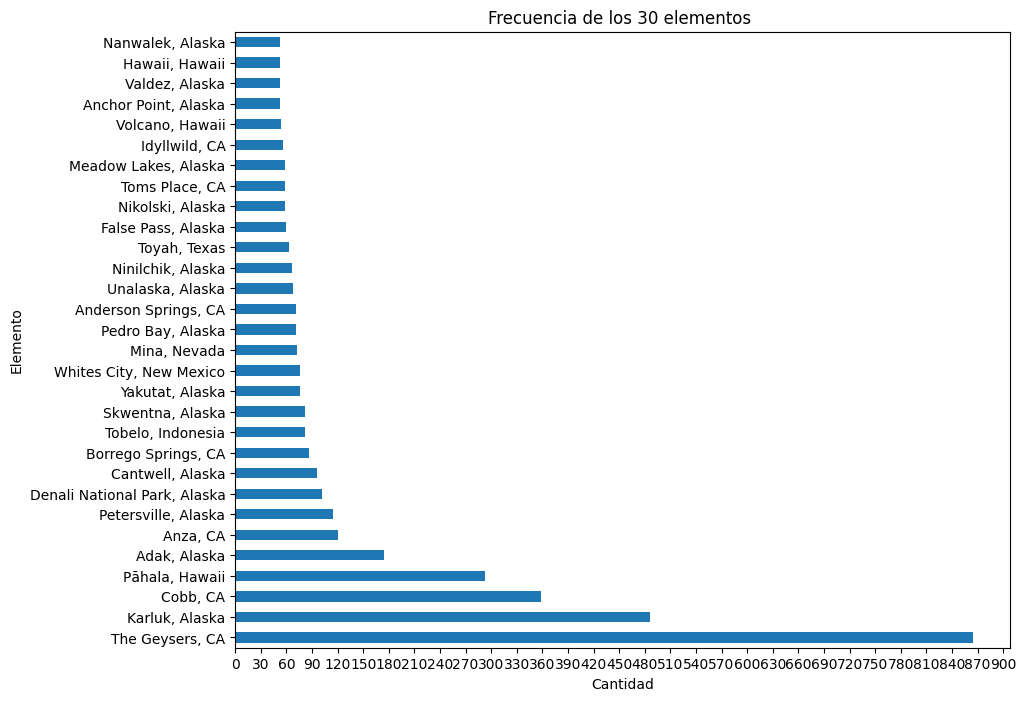

In [29]:
# Filtrar los 20 elementos más frecuentes (puedes ajustar este número según tus necesidades)
top_30 = conteo[:30]

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 8))
ax = top_30.plot(kind='barh')
plt.xlabel("Cantidad")
plt.ylabel("Elemento")
plt.title("Frecuencia de los 30 elementos ")


ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
plt.show()

In [30]:
df.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
hora               0
fecha              0
dtype: int64

In [31]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,hora,fecha
0,2023-02-06 09:24:52,33.527000,-116.779167,11.64,0.94,ml,9.0,240.00,0.05,0.11,ci,ci40411544,2023-02-06 09:28:26,"Anza, CA",earthquake,2.43,1.97,0.33,11.0,automatic,ci,ci,09:24:52,2023-02-06
1,2023-02-06 09:04:16,19.193001,-155.392838,32.18,2.77,md,33.0,180.00,0.70,0.12,hv,hv73320217,2023-02-06 09:07:27,"Pāhala, Hawaii",earthquake,0.62,0.78,2.77,4.0,automatic,hv,hv,09:04:16,2023-02-06
2,2023-02-06 08:58:45,61.110200,-151.162700,53.90,2.00,ml,24.0,118.28,0.70,0.75,ak,ak0231pbzu3m,2023-02-06 09:01:03,"Tyonek, Alaska",earthquake,1.82,1.00,0.26,16.0,automatic,ak,ak,08:58:45,2023-02-06
3,2023-02-06 08:52:37,37.449000,37.233400,10.00,4.80,mb,58.0,61.00,0.28,0.78,us,us6000jlpv,2023-02-06 09:31:48,"Pazarcık, Turkey",earthquake,7.54,1.88,0.07,60.0,reviewed,us,us,08:52:37,2023-02-06
4,2023-02-06 08:51:11,38.842667,-122.829666,2.48,0.66,md,11.0,115.00,0.01,0.03,nc,nc73842531,2023-02-06 09:15:15,"Cobb, CA",earthquake,0.33,0.99,0.24,12.0,automatic,nc,nc,08:51:11,2023-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9394,2023-01-07 09:56:14,61.695000,-146.491500,36.60,1.10,ml,24.0,118.28,0.70,0.41,ak,ak023bqg8ol,2023-01-25 02:21:24,"Nelchina, Alaska",earthquake,1.82,0.60,0.26,16.0,reviewed,ak,ak,09:56:14,2023-01-07
9395,2023-01-07 09:52:03,62.316500,-151.554000,90.60,1.20,ml,24.0,118.28,0.70,0.38,ak,ak023bqfhfp,2023-01-25 02:21:24,"Skwentna, Alaska",earthquake,1.82,0.50,0.26,16.0,reviewed,ak,ak,09:52:03,2023-01-07
9396,2023-01-07 09:50:20,69.150700,-144.563700,15.70,1.60,ml,24.0,118.28,0.70,0.23,ak,ak023bqf3bc,2023-01-26 00:27:22,"Kaktovik, Alaska",earthquake,1.82,2.20,0.26,16.0,reviewed,ak,ak,09:50:20,2023-01-07
9397,2023-01-07 09:42:17,67.472500,-166.586100,19.50,1.80,ml,24.0,118.28,0.70,0.31,ak,ak023bqddbr,2023-01-26 00:27:21,"Kivalina, Alaska",earthquake,1.82,1.30,0.26,16.0,reviewed,ak,ak,09:42:17,2023-01-07


# Ingenieria de variables 

In [32]:
df['s_tipo_profu'] = np.where(df['depth'] <= 70, 'superficial',
                    np.where((df['depth'] >= 71) & (df['depth'] <= 299), 'intermedio',
                    np.where(df['depth'] >= 300, 'profundo', 'N/A')))
# creamos la columnas tipo_profu: tipo de profundidad 

In [33]:
df['s_danio'] = np.where(df['mag'] < 3.5, 'sin danios',
                    np.where((df['mag'] >= 3.5) & (df['mag'] <= 5.4), 'danios menores',
                    np.where((df['mag'] >= 5.5) & (df['mag'] <= 6), 'danios ligeros',
                    np.where((df['mag'] >= 6.1) & (df['mag'] <= 6.9), 'danios severos',
                    np.where((df['mag'] >= 7.0) & (df['mag'] <= 7.9), 'danios graves', 
                    np.where(df['mag'] >= 8.0, 'danios totales', ''))))))

# agragamos la columa de danio, la cual significa: cantidad de daño.

In [34]:
df['prec_gap'] = np.where(df['gap'] <= 90, 'muy preciso',
                np.where((df['gap'] >= 91) & (df['gap'] <= 119), 'regu preciso',
                np.where(df['gap'] >= 120, 'poco preciso', 'otro valor')))

#generamos la oclumna prec_gap: precision por gpa (angulo de separacion entre estaciones)

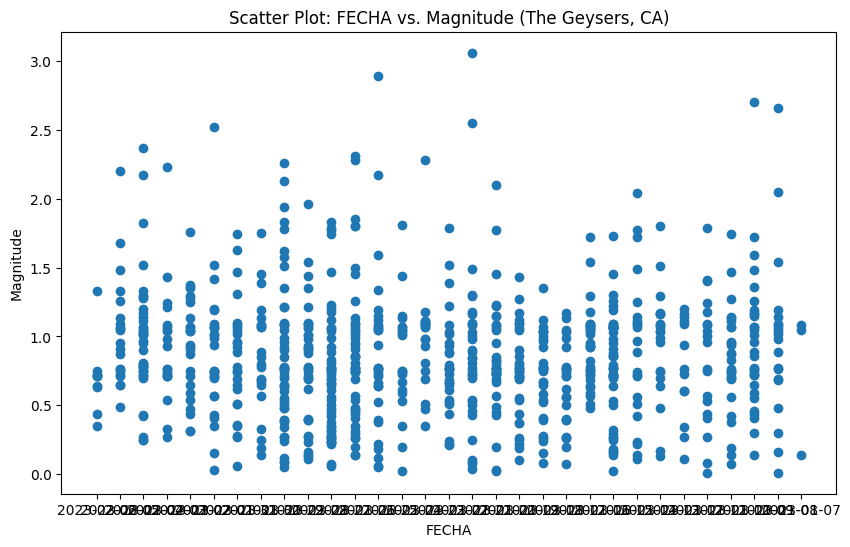

In [35]:

# Filtrar los datos para el elemento "The Geysers, CA"
df_geysers = df[df['place'] == 'The Geysers, CA']

plt.figure(figsize=(10, 6))
plt.scatter(df_geysers['fecha'], df_geysers['mag'])
plt.xlabel('FECHA')
plt.ylabel('Magnitude')
plt.title('Scatter Plot: FECHA vs. Magnitude (The Geysers, CA)')
plt.show()



In [36]:
df_geysers

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,hora,fecha,s_tipo_profu,s_danio,prec_gap
6,2023-02-06 08:20:31,38.786499,-122.744499,1.55,0.72,md,10.0,84.0,0.01,0.01,nc,nc73842521,2023-02-06 08:51:14,"The Geysers, CA",earthquake,0.28,0.52,0.08,8.0,automatic,nc,nc,08:20:31,2023-02-06,superficial,sin danios,muy preciso
8,2023-02-06 08:09:25,38.814335,-122.824669,11.83,0.71,md,4.0,184.0,0.01,0.01,nc,nc73842511,2023-02-06 08:57:10,"The Geysers, CA",earthquake,2.98,6.71,0.14,3.0,automatic,nc,nc,08:09:25,2023-02-06,superficial,sin danios,poco preciso
19,2023-02-06 06:31:08,38.796665,-122.748497,0.98,0.44,md,7.0,96.0,0.02,0.02,nc,nc73842501,2023-02-06 08:42:15,"The Geysers, CA",earthquake,0.56,3.07,0.29,9.0,automatic,nc,nc,06:31:08,2023-02-06,superficial,sin danios,regu preciso
25,2023-02-06 05:49:09,38.823502,-122.851829,1.81,0.63,md,11.0,103.0,0.01,0.01,nc,nc73842496,2023-02-06 08:15:14,"The Geysers, CA",earthquake,0.28,0.70,0.18,12.0,automatic,nc,nc,05:49:09,2023-02-06,superficial,sin danios,regu preciso
27,2023-02-06 05:40:55,38.832832,-122.816834,1.41,0.71,md,9.0,85.0,0.01,0.01,nc,nc73842491,2023-02-06 07:47:19,"The Geysers, CA",earthquake,0.34,0.96,0.16,10.0,automatic,nc,nc,05:40:55,2023-02-06,superficial,sin danios,muy preciso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9122,2023-01-08 03:16:49,38.772835,-122.738502,0.51,1.04,md,6.0,104.0,0.01,0.01,nc,nc73829786,2023-01-08 03:34:13,"The Geysers, CA",earthquake,0.32,0.75,0.36,7.0,automatic,nc,nc,03:16:49,2023-01-08,superficial,sin danios,regu preciso
9168,2023-01-08 00:16:27,38.831500,-122.815333,1.85,0.89,md,19.0,50.0,0.01,0.02,nc,nc73829756,2023-01-12 21:17:09,"The Geysers, CA",earthquake,0.24,0.41,0.09,3.0,reviewed,nc,nc,00:16:27,2023-01-08,superficial,sin danios,muy preciso
9224,2023-01-07 20:23:02,38.838165,-122.827164,1.93,1.08,md,8.0,174.0,0.02,0.04,nc,nc73829721,2023-01-07 20:39:12,"The Geysers, CA",earthquake,0.83,1.22,0.33,10.0,automatic,nc,nc,20:23:02,2023-01-07,superficial,sin danios,poco preciso
9278,2023-01-07 16:42:56,38.790500,-122.760333,1.80,0.14,md,13.0,99.0,0.01,0.02,nc,nc73829696,2023-01-12 20:21:03,"The Geysers, CA",earthquake,0.27,0.42,0.19,3.0,reviewed,nc,nc,16:42:56,2023-01-07,superficial,sin danios,regu preciso


In [37]:
conteo_elementos = df_geysers['fecha'].value_counts()
print(conteo_elementos)


2023-01-27    52
2023-01-29    49
2023-01-15    48
2023-01-26    46
2023-02-04    39
2023-01-28    36
2023-01-20    35
2023-01-21    33
2023-01-16    33
2023-01-19    32
2023-01-09    31
2023-01-25    31
2023-01-18    30
2023-01-22    29
2023-02-01    27
2023-01-10    27
2023-01-31    26
2023-02-02    26
2023-01-17    25
2023-01-30    22
2023-01-14    22
2023-02-05    21
2023-01-24    21
2023-01-08    20
2023-02-03    20
2023-01-13    20
2023-01-11    19
2023-01-23    19
2023-01-12    13
2023-02-06    10
2023-01-07     3
Name: fecha, dtype: int64


In [38]:
fecha_mas_reciente = df['fecha'].max()
print(fecha_mas_reciente)

2023-02-06


In [39]:
df_geysers['time_numeric'] = pd.to_datetime(df_geysers['time']).astype(int)

/tmp/ipykernel_9168/515130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geysers['time_numeric'] = pd.to_datetime(df_geysers['time']).astype(int)


# Modelo 

In [40]:
model = LinearRegression()
model.fit(df_geysers[['time_numeric']], df_geysers['mag'])
fechas_posteriores = ['2023-02-08', '2023-02-10', '2023-02-12', '2023-02-20', '2023-02-28', '2023-03-08', '2023-04-08']
fechas_posteriores_numeric = pd.to_datetime(fechas_posteriores).astype(int)
mag_estimado = model.predict(fechas_posteriores_numeric.values.reshape(-1, 1))

/home/luis/Documentos/entornos/env_modulo_1/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
resultados = pd.DataFrame({'Fecha': fechas_posteriores, 'Estimación de Mag': mag_estimado})
print(resultados)
res = ['2023-02-08', '2023-02-10', '2023-02-12', '2023-02-20', '2023-02-28', '2023-03-08', '2023-04-08']
fechas_posteriores_numeric = pd.to_datetime(fechas_posteriores).astype(int)
mag_estimado = model.predict(fechas_posteriores_numeric.reshape(-1, 1))

        Fecha  Estimación de Mag
0  2023-02-08           0.875205
1  2023-02-10           0.878325
2  2023-02-12           0.881445
3  2023-02-20           0.893925
4  2023-02-28           0.906405
5  2023-03-08           0.918885
6  2023-04-08           0.967244


AttributeError: 'Int64Index' object has no attribute 'reshape'

In [42]:
resultados = pd.DataFrame({'Fecha': fechas_posteriores, 'Estimación de Mag': mag_estimado})
print(resultados)

        Fecha  Estimación de Mag
0  2023-02-08           0.875205
1  2023-02-10           0.878325
2  2023-02-12           0.881445
3  2023-02-20           0.893925
4  2023-02-28           0.906405
5  2023-03-08           0.918885
6  2023-04-08           0.967244
